In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud


In [57]:
df = pd.read_csv('C:\\Users\\Eduarda\\Documents\\real_state\\data\\properati-BR-2016-11-01-properties-sell.csv')

In [58]:
df['rooms'].value_counts()

rooms
1.0     221926
2.0     165954
3.0     101426
4.0      29104
5.0       6133
6.0       3555
8.0       2563
7.0       2479
10.0      2007
9.0       1647
12.0      1352
11.0       912
14.0       576
15.0       547
13.0       536
16.0       262
18.0       192
20.0       156
17.0       124
19.0        57
21.0        53
22.0        48
25.0        31
30.0        28
23.0        20
24.0        19
27.0        11
33.0         8
28.0         4
36.0         4
26.0         3
32.0         3
31.0         2
35.0         2
29.0         1
34.0         1
Name: count, dtype: int64

In [59]:
df = df[df['property_type'] == 'apartment']

## Data Overview

In [60]:
df.head(5)

,created_on,operation,property_type,place_name,place_with_parent_names,geonames_id,lat-lon,lat,lon,price,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,2013-04-25,sell,apartment,Mondubim,|Brasil|Ceará|Fortaleza|Mondubim|,NaN,NaN,NaN,NaN,155900.0,...,NaN,NaN,NaN,NaN,2.0,NaN,http://mondubim.properati.com.br/px9_vende-se_...,"Otimo Imovel com o melhor valor da regiao, con...",Apartamento Em Fortaleza,https://thumbs-cf.properati.com/8/EY670SQWML7c...
3,2013-04-25,sell,apartment,Manhuaçu,|Brasil|Minas Gerais|Manhuaçu|,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,http://manhuacu.properati.com.br/pxy_vende-se_...,"Otimo Imovel com o melhor valor da regiao, con...",Apartamento Em Manhuacu,NaN
4,2013-04-25,sell,apartment,Manhuaçu,|Brasil|Minas Gerais|Manhuaçu|,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,http://manhuacu.properati.com.br/pxz_vende-se_...,"Otimo Imovel com o melhor valor da regiao, con...",Apartamento Em Manhuacu,https://thumbs-cf.properati.com/2/UhPHI8dsNCb4...
5,2013-04-25,sell,apartment,Manhuaçu,|Brasil|Minas Gerais|Manhuaçu|,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,http://manhuacu.properati.com.br/py8_vende-se_...,"Otimo Imovel com o melhor valor da regiao, con...",Apartamento Em Manhuacu,https://thumbs-cf.properati.com/5/abmv2EZi0cb5...
7,2013-04-25,sell,apartment,Manhuaçu,|Brasil|Minas Gerais|Manhuaçu|,NaN,NaN,NaN,NaN,95000.0,...,NaN,NaN,NaN,NaN,3.0,NaN,http://manhuacu.properati.com.br/pyb_vende-se_...,"Otimo Imovel com o melhor valor da regiao, con...",Apartamento Em Manhuacu,NaN


In [61]:
df.shape

(567135, 24)

In [62]:
df.columns

Index(['created_on', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail'],
      dtype='object')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 567135 entries, 0 to 872668
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   created_on                  567135 non-null  object 
 1   operation                   567135 non-null  object 
 2   property_type               567135 non-null  object 
 3   place_name                  567135 non-null  object 
 4   place_with_parent_names     567135 non-null  object 
 5   geonames_id                 97 non-null      float64
 6   lat-lon                     273006 non-null  object 
 7   lat                         273006 non-null  float64
 8   lon                         273006 non-null  float64
 9   price                       530859 non-null  float64
 10  currency                    530841 non-null  object 
 11  price_aprox_local_currency  530859 non-null  float64
 12  price_aprox_usd             530859 non-null  float64
 13  surface_total_in_m2

In [64]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
geonames_id,97.0,4.164138e+06,0.000000e+00,4.164138e+06,4.164138e+06,4.164138e+06,4.164138e+06,4.164138e+06
lat,273006.0,-2.402636e+01,4.655505e+00,-3.369243e+01,-2.401835e+01,-2.360362e+01,-2.330974e+01,3.687621e+01
lon,273006.0,-4.706485e+01,3.688534e+00,-1.109004e+02,-4.841130e+01,-4.666833e+01,-4.646094e+01,4.808623e+01
price,530859.0,8.047802e+05,1.358460e+06,0.000000e+00,2.968000e+05,4.800000e+05,8.600000e+05,1.600000e+08
price_aprox_local_currency,530859.0,8.057070e+05,1.361665e+06,0.000000e+00,2.974420e+05,4.791013e+05,8.583898e+05,1.597004e+08
price_aprox_usd,530859.0,2.518936e+05,4.257067e+05,0.000000e+00,9.299132e+04,1.497847e+05,2.683642e+05,4.992823e+07
surface_total_in_m2,146701.0,2.775944e+02,2.931968e+03,0.000000e+00,6.100000e+01,9.600000e+01,1.580000e+02,1.965690e+05
surface_covered_in_m2,422816.0,1.635516e+02,1.785567e+04,0.000000e+00,6.000000e+01,8.000000e+01,1.250000e+02,1.111111e+07
price_usd_per_m2,390150.0,2.382056e+03,1.634693e+04,1.741247e-02,1.373026e+03,1.858460e+03,2.637054e+03,6.872568e+06
price_per_m2,390150.0,7.617900e+03,5.236660e+04,5.580000e-02,4.390625e+03,5.940476e+03,8.437500e+03,2.202383e+07


## Univariate analysis

### Categorical

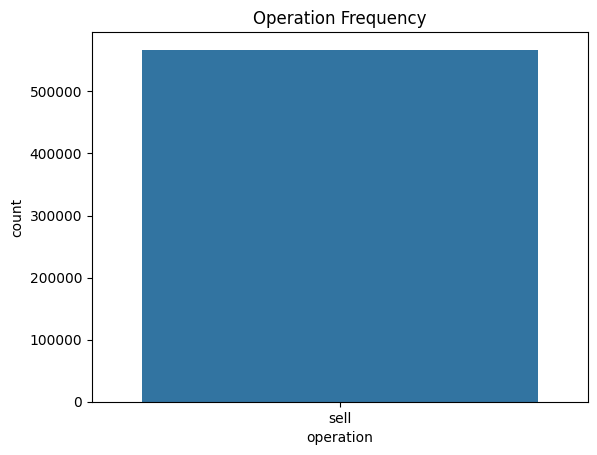

In [65]:
sns.countplot(data=df, x='operation')
plt.title('Operation Frequency')
plt.show()

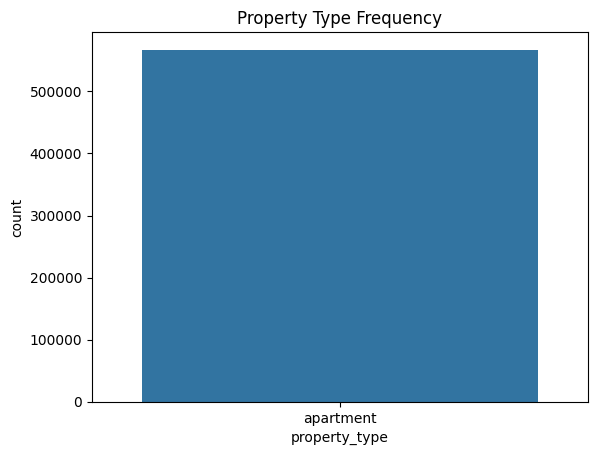

In [66]:
sns.countplot(data=df, x='property_type')
plt.title('Property Type Frequency')
plt.show()

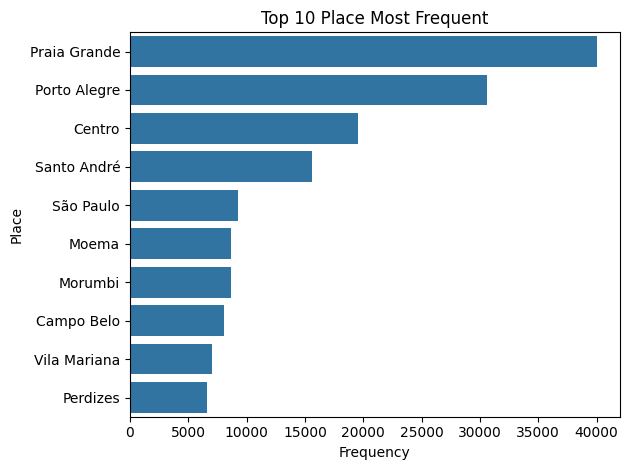

In [67]:
top_place = df['place_name'].value_counts().head(10)
top_place_df = top_place.reset_index()
top_place_df.columns = ['place_name', 'frequency']

sns.barplot(data=top_place_df, x='frequency', y='place_name')
plt.title("Top 10 Place Most Frequent")
plt.xlabel("Frequency")
plt.ylabel("Place")
plt.tight_layout()
plt.show()


Text(0, 0.5, 'place')

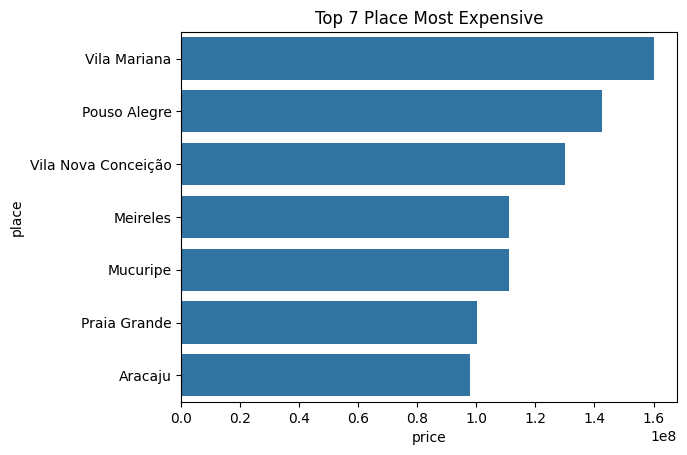

In [68]:
df_top_price = df.nlargest(10, 'price')
df_top_price
sns.barplot(data=df_top_price, x='price', y='place_name')
plt.title('Top 7 Place Most Expensive')
plt.ylabel('place')

In [69]:
df['state'] = df['place_with_parent_names'].str.split('|').str[2]

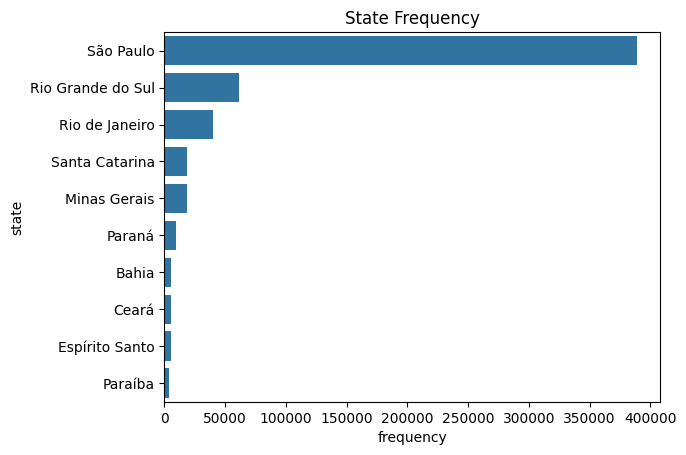

In [70]:
top_state = df['state'].value_counts().head(10)
top_state_df = top_state.reset_index()
top_state_df.columns = ['state', 'frequency']

sns.barplot(data=top_state_df, x='frequency', y='state')
plt.title('State Frequency')
plt.show()

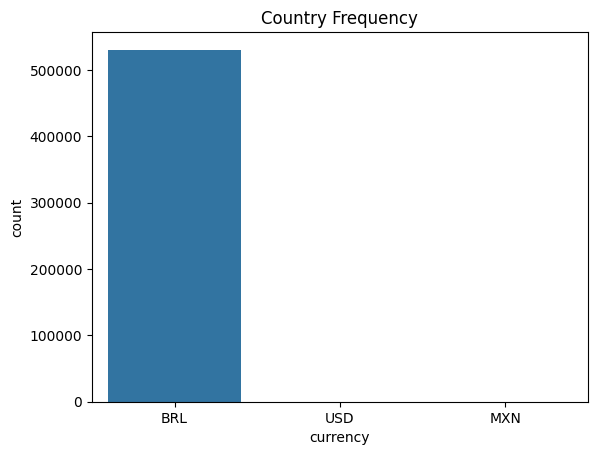

In [71]:
sns.countplot(data=df, x='currency')
plt.title('Country Frequency')
plt.show()

### Numericaa

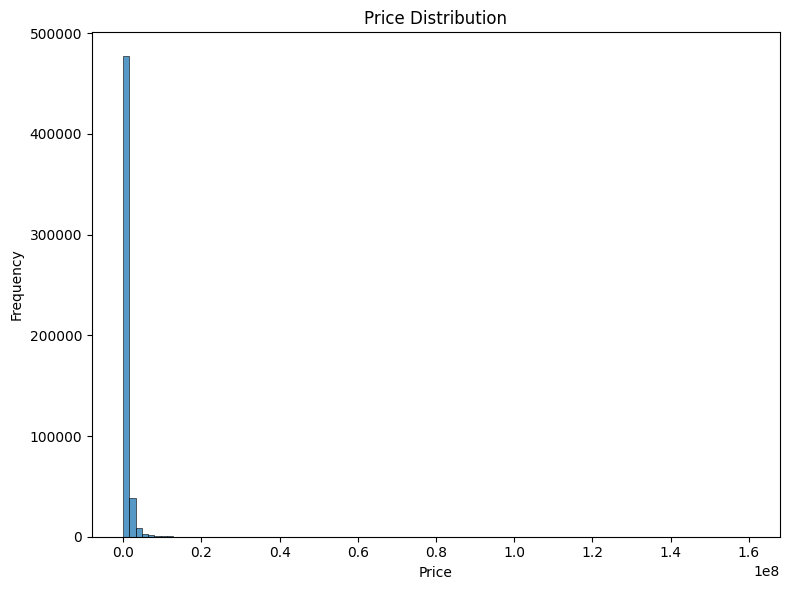

In [72]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Criar pasta 'images' na raiz do projeto, se não existir
images_dir = os.path.join('..', 'images')
os.makedirs(images_dir, exist_ok=True)

# Criar figura
plt.figure(figsize=(8,6))

# Histograma de preços
sns.histplot(data=df, x='price', bins=100)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()  # evita cortar títulos

# Salvar gráfico antes de mostrar
plt.savefig(os.path.join(images_dir, 'price_distribution.png'), dpi=300)
plt.savefig('price_distribution.png', dpi=300)  # opcional: salvar também na pasta do notebook

# Mostrar na tela
plt.show()

# Fechar figura
plt.close()


Text(0, 0.5, 'Frequency')

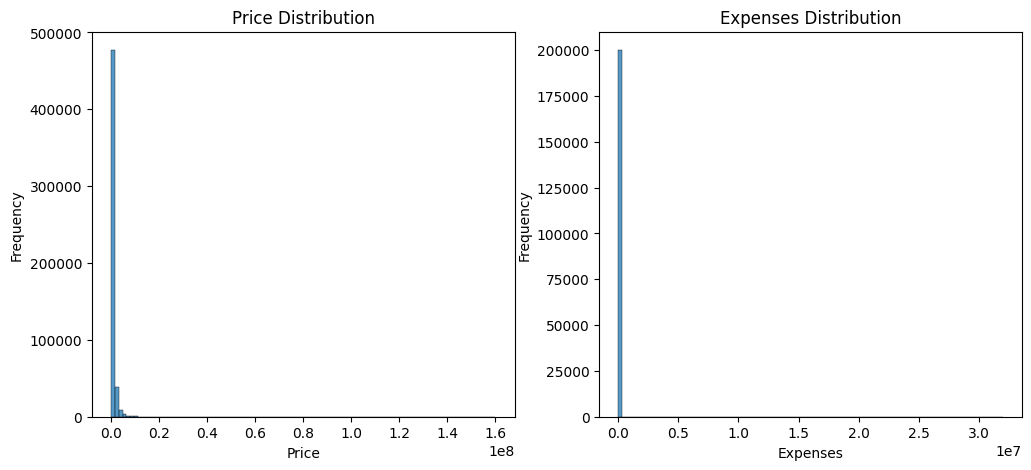

In [42]:
fig, axes = plt.subplots(1,2, figsize=(12, 5))

sns.histplot(data=df, x='price', ax=axes[0], bins=100)
axes[0].set_title('Price Distribution')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

sns.histplot(data=df, x='expenses', ax=axes[1], bins=100)
axes[1].set_title('Expenses Distribution')
axes[1].set_xlabel('Expenses')
axes[1].set_ylabel('Frequency')


Text(0, 0.5, 'Frequency')

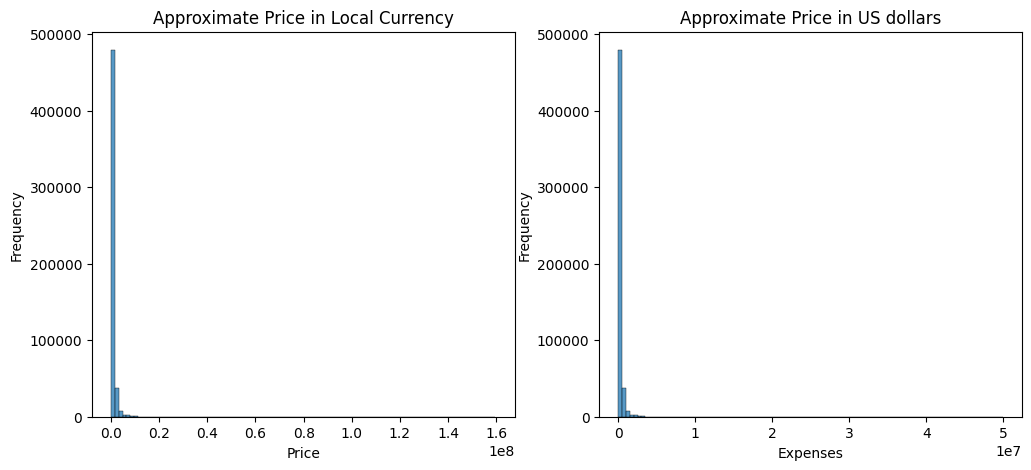

In [43]:
fig, axes = plt.subplots(1,2, figsize=(12, 5))

sns.histplot(data=df, x='price_aprox_local_currency', ax=axes[0], bins=100)
axes[0].set_title('Approximate Price in Local Currency')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

sns.histplot(data=df, x='price_aprox_usd', ax=axes[1], bins=100)
axes[1].set_title('Approximate Price in US dollars')
axes[1].set_xlabel('Expenses')
axes[1].set_ylabel('Frequency')


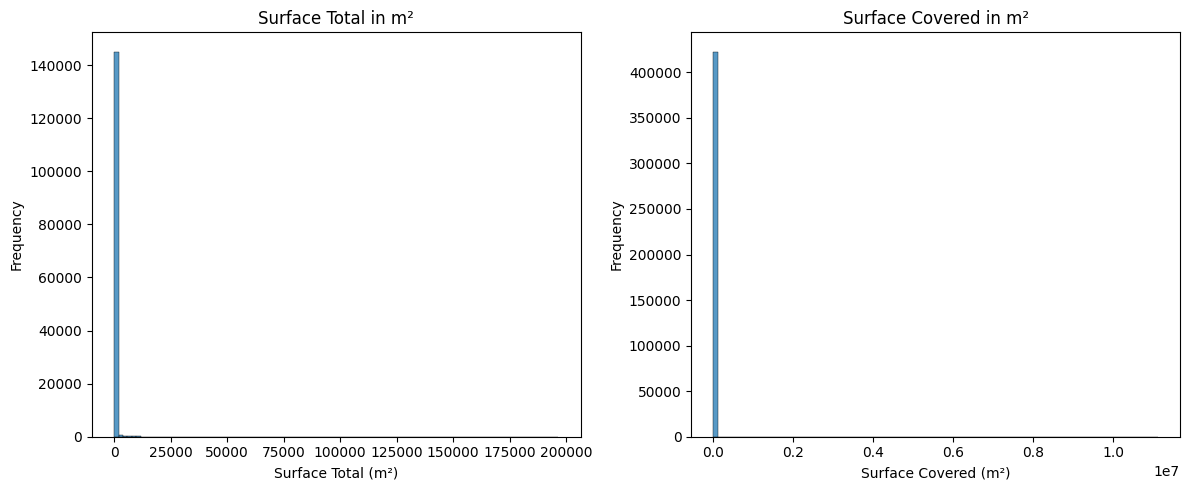

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


sns.histplot(data=df, x='surface_total_in_m2', ax=axes[0], bins=100)
axes[0].set_title('Surface Total in m²')
axes[0].set_xlabel('Surface Total (m²)')
axes[0].set_ylabel('Frequency')

sns.histplot(data=df, x='surface_covered_in_m2', ax=axes[1], bins=100)
axes[1].set_title('Surface Covered in m²')
axes[1].set_xlabel('Surface Covered (m²)')
axes[1].set_ylabel('Frequency')

plt.tight_layout() 
plt.show()

Text(0, 0.5, 'Frequency')

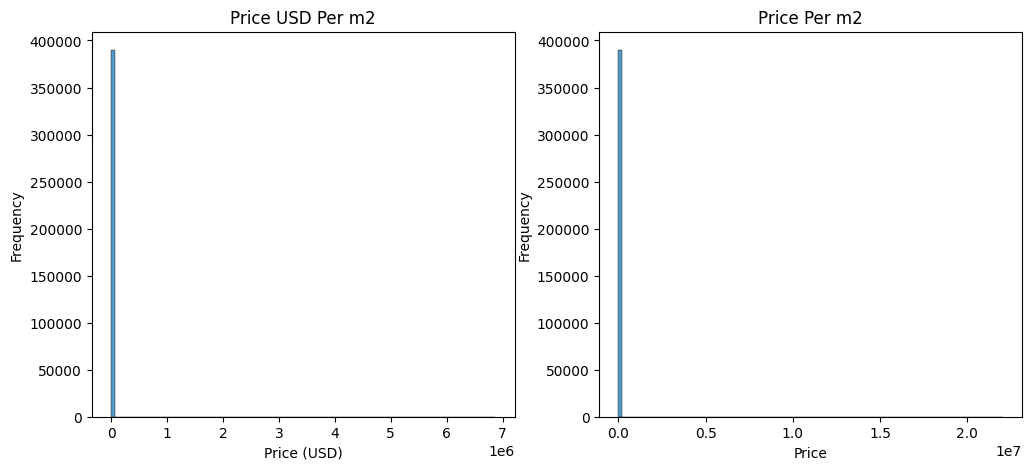

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=df, x='price_usd_per_m2', ax=axes[0], bins=100)
axes[0].set_title('Price USD Per m2')
axes[0].set_xlabel('Price (USD)')
axes[0].set_ylabel('Frequency')

sns.histplot(data=df, x='price_per_m2', ax=axes[1], bins=100)
axes[1].set_title('Price Per m2')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

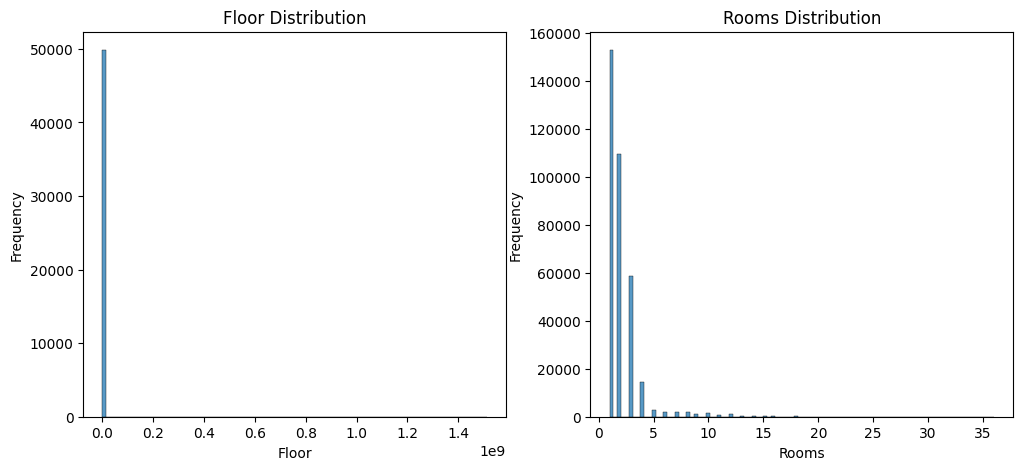

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=df, x='floor', ax=axes[0], bins=100)
axes[0].set_title('Floor Distribution')
axes[0].set_xlabel('Floor')
axes[0].set_ylabel('Frequency')

sns.histplot(data=df, x='rooms', ax=axes[1], bins=100)
axes[1].set_title('Rooms Distribution')
axes[1].set_xlabel('Rooms')
axes[1].set_ylabel('Frequency')

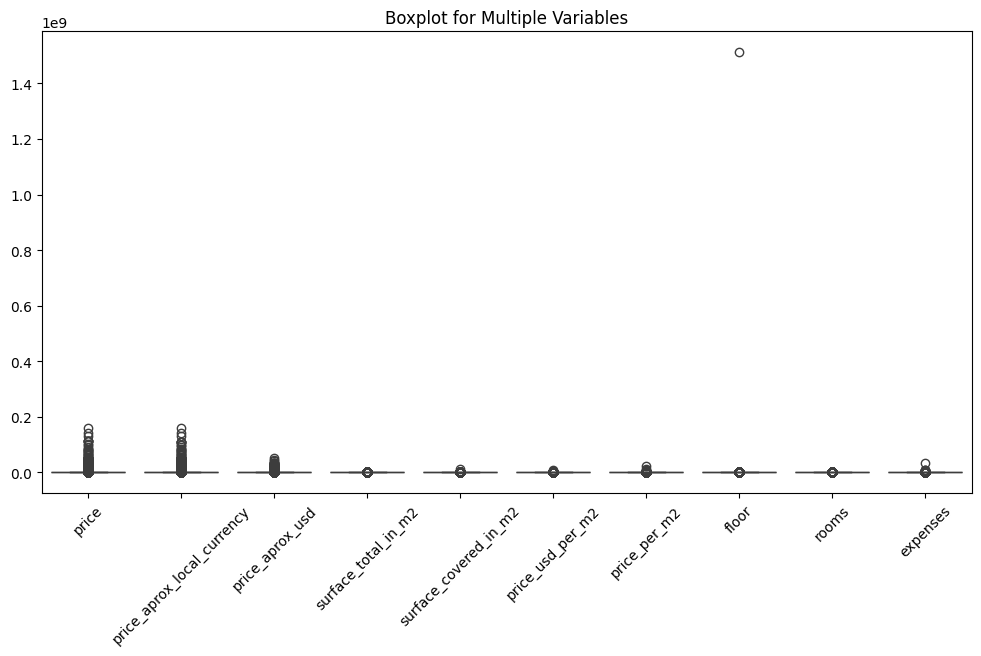

In [47]:
cols = ['price', 'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor', 'rooms', 'expenses']

plt.figure(figsize=(12,6))
sns.boxplot(data=df[cols])
plt.xticks(rotation=45)
plt.title('Boxplot for Multiple Variables')
plt.show()

## Bivariate analysis

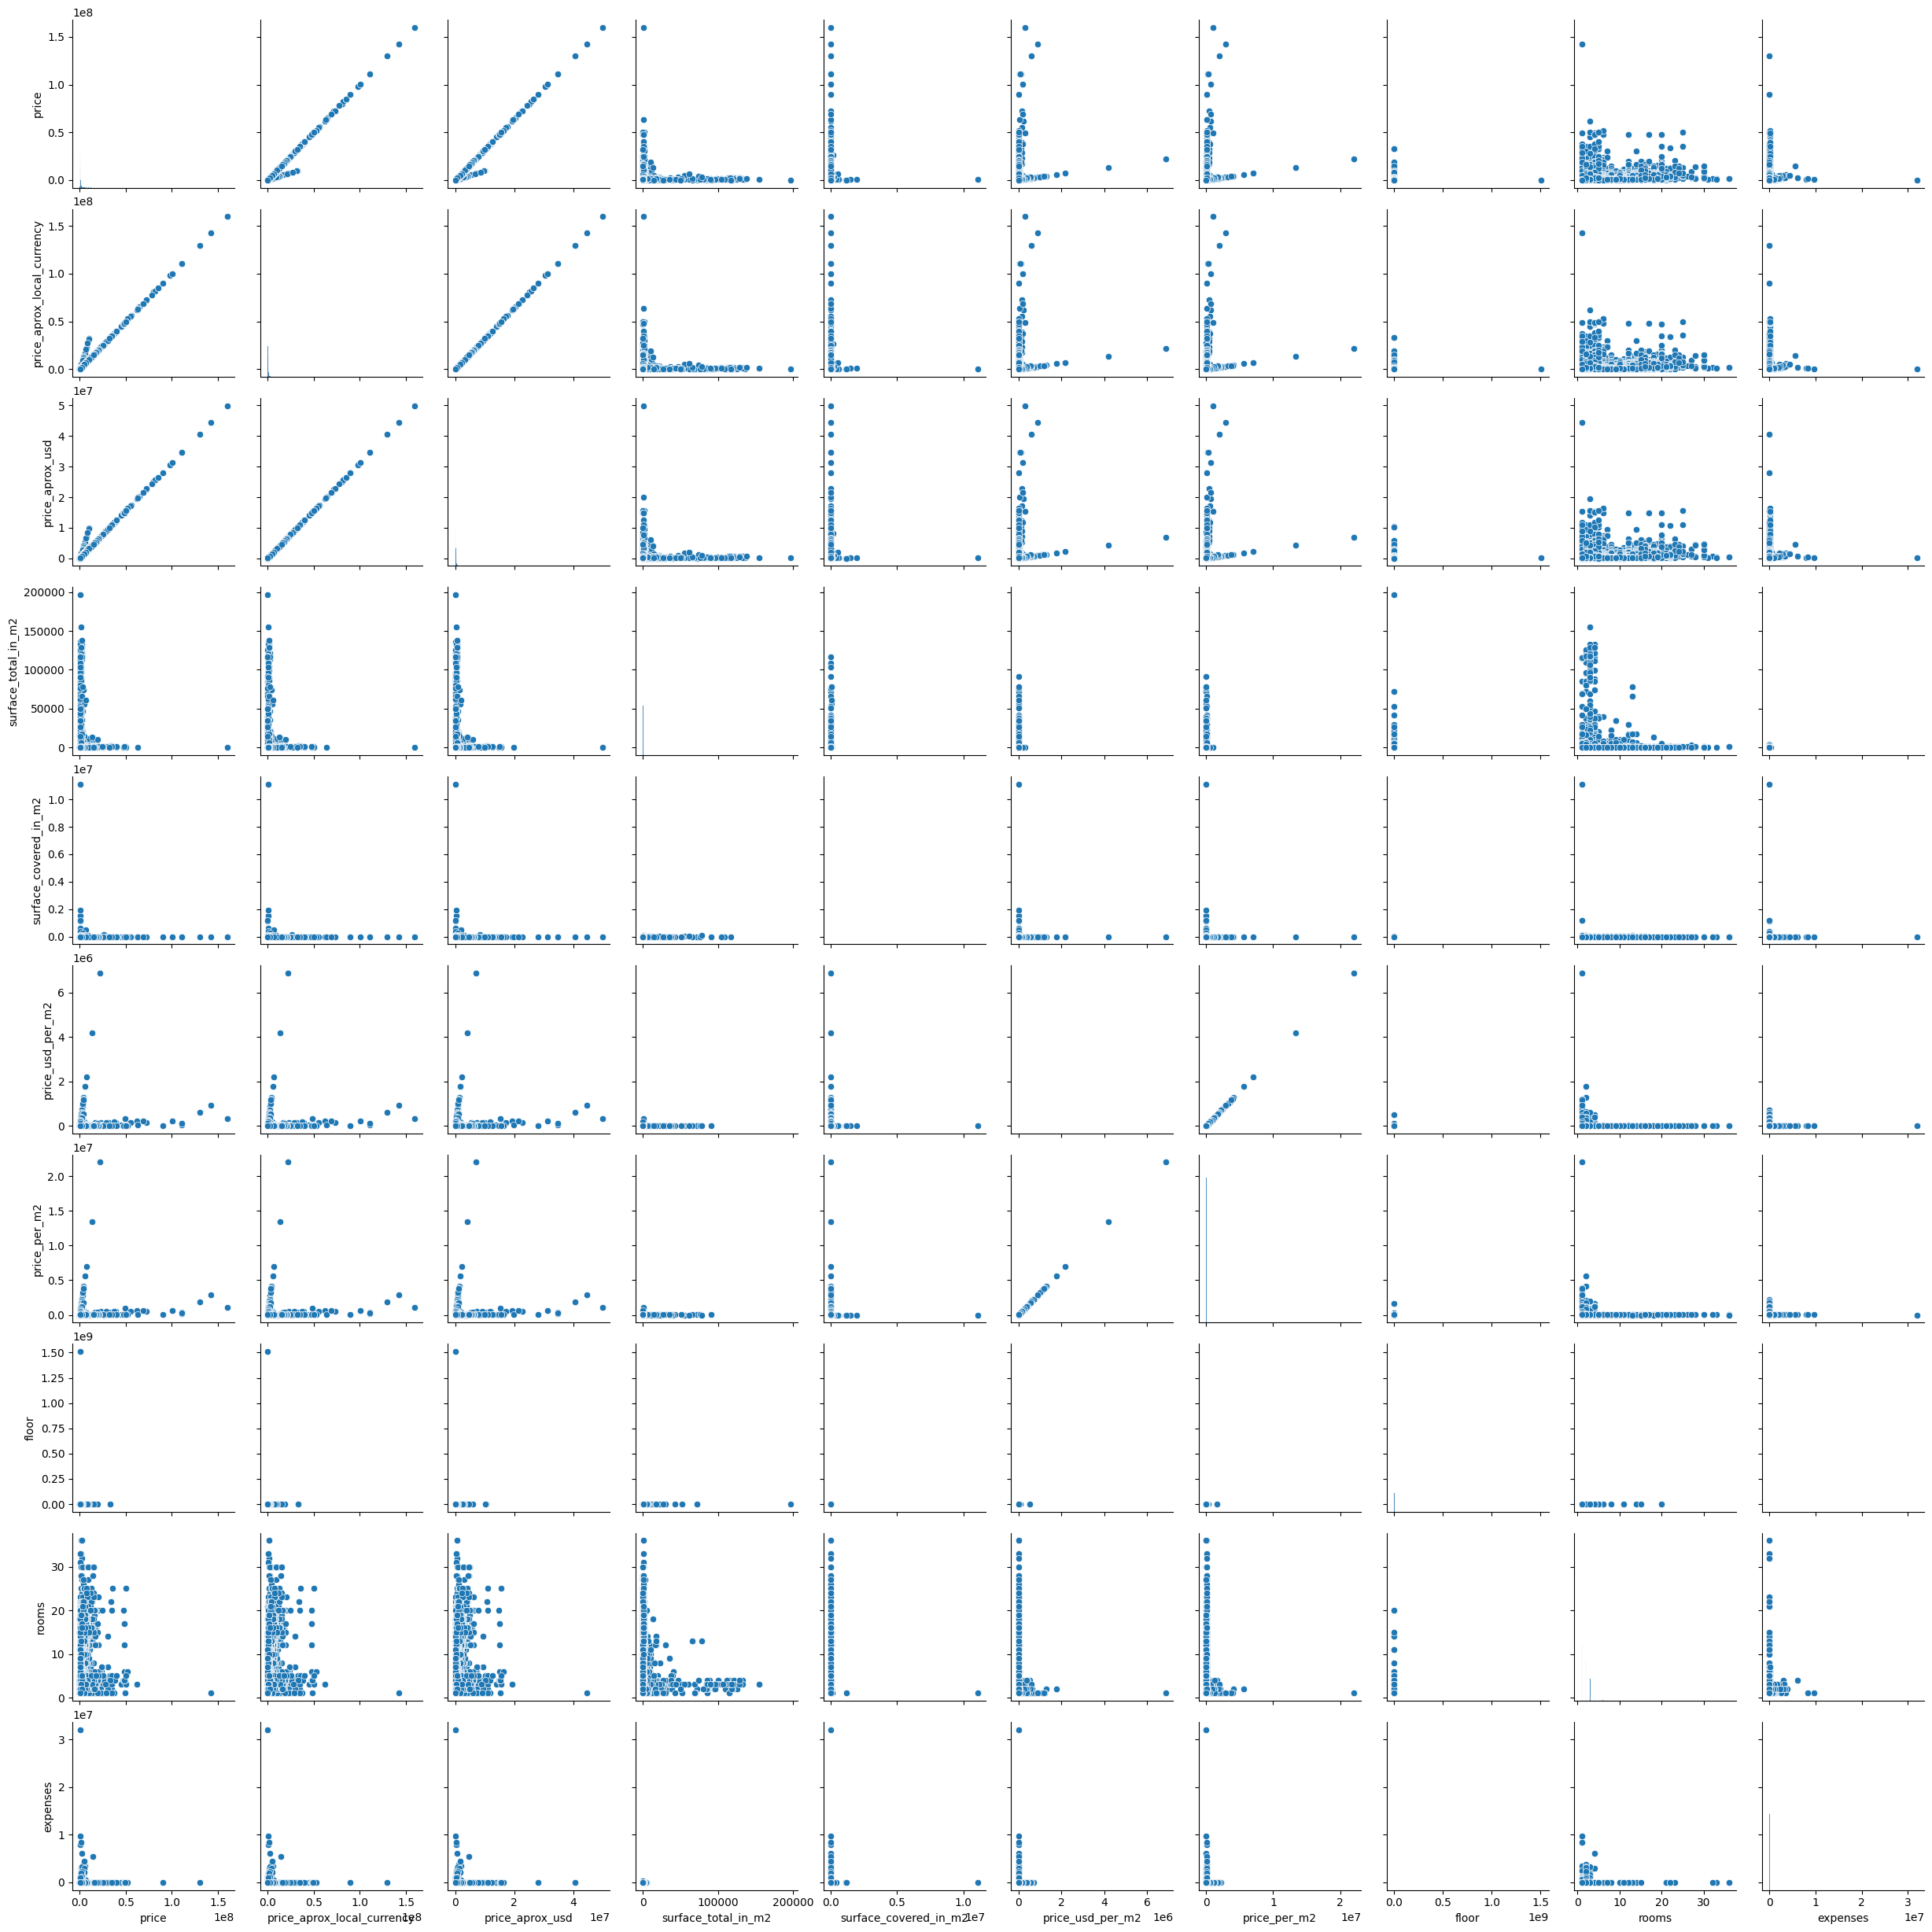

In [48]:
cols = ['price', 'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor', 'rooms', 'expenses']
sns.pairplot(df[cols])

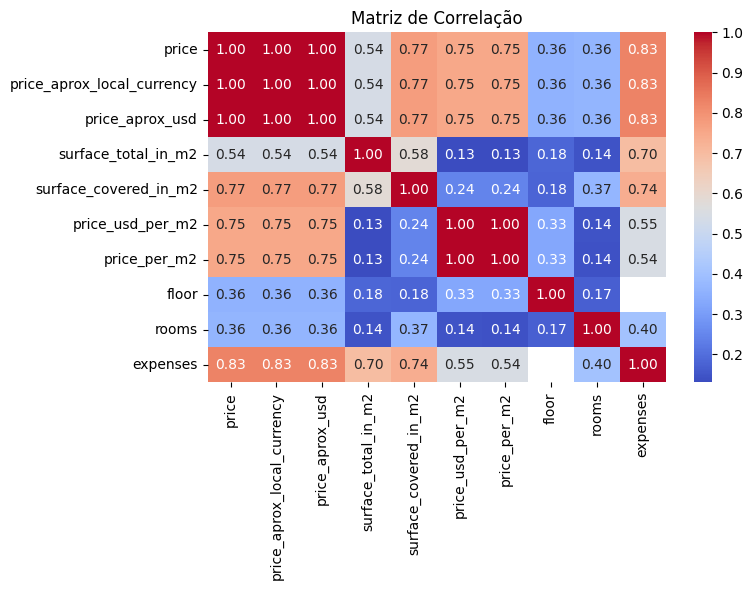

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df[cols].corr(method='spearman', numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.tight_layout()  

plt.show()
plt.close()


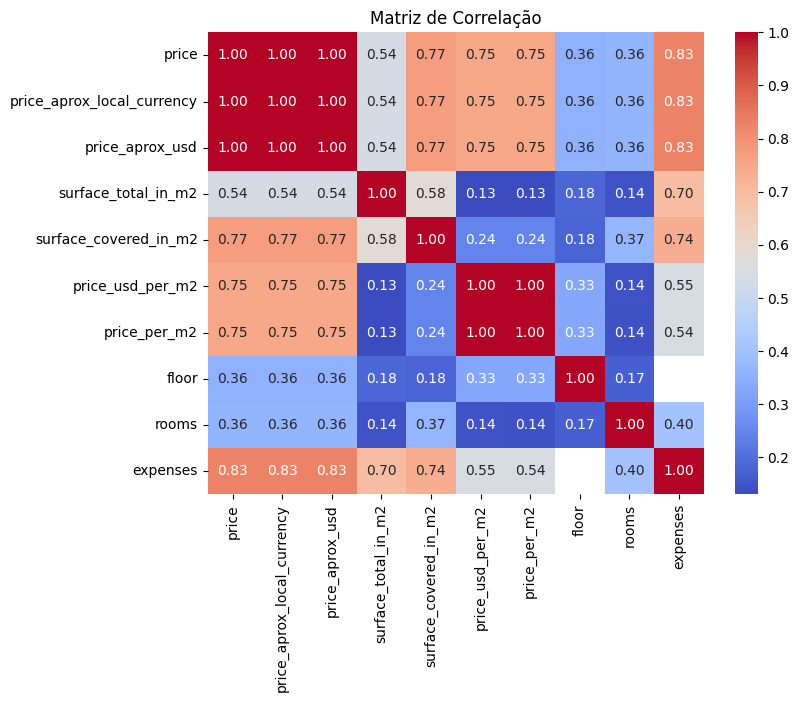

<Figure size 640x480 with 0 Axes>

In [53]:
corr_matrix = df[cols].corr(method='spearman', numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

images_dir = os.path.join('..', 'images')
#os.makedirs('images', exist_ok=True)
plt.tight_layout()  # garante que nada fique cortado
plt.savefig( 'correlation_matrix.png', dpi=300)
plt.savefig(os.path.join(images_dir, 'correlation_matrix.png'), dpi=300)

<Axes: xlabel='price', ylabel='state'>

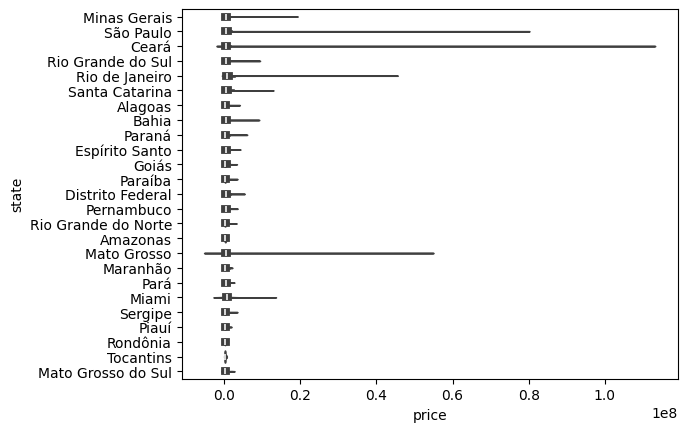

In [51]:
df_sample = df.sample(100000, random_state=42)
sns.violinplot(data=df_sample, x='price', y='state', orient='h')

<Axes: xlabel='price_per_m2', ylabel='state'>

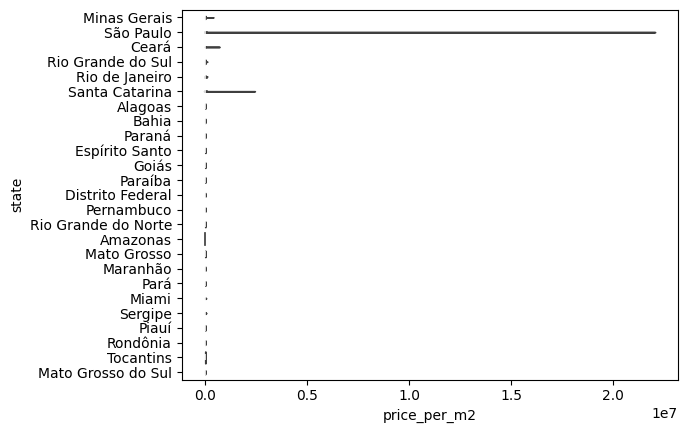

In [52]:
df_sample = df.sample(100000, random_state=42)
sns.violinplot(data=df_sample, x='price_per_m2', y='state', orient='h')

<Axes: xlabel='price', ylabel='rooms'>

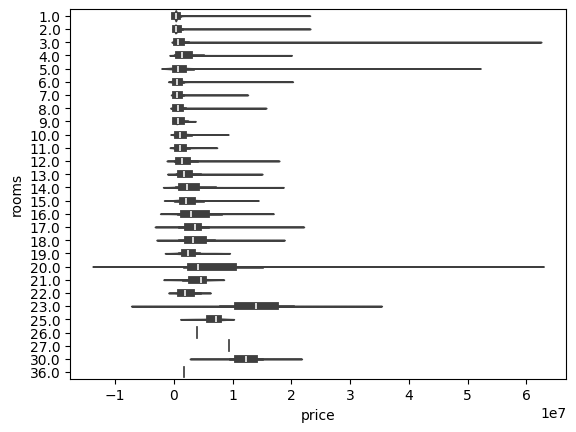

In [53]:
df_sample = df.sample(100000, random_state=42)
sns.violinplot(data=df_sample, x='price', y='rooms', orient='h')

<Axes: xlabel='expenses', ylabel='state'>

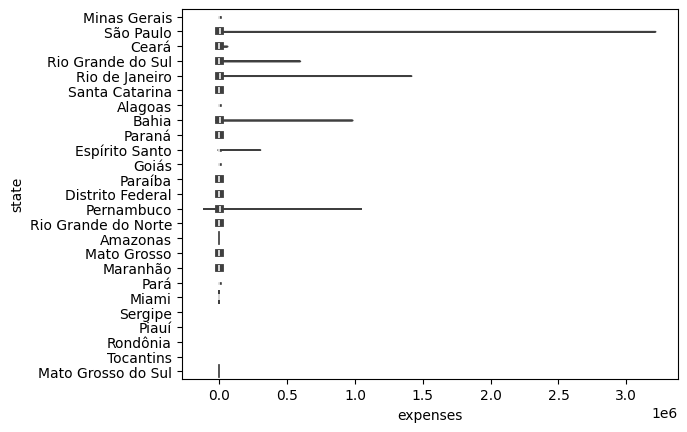

In [54]:
df_sample = df.sample(100000, random_state=42)
sns.violinplot(data=df_sample, x='expenses', y='state', orient='h')

In [55]:
#Mann-Whitney U Test (versão não paramétrica do t-test para dois grupos independentes)

#Hipotese nula: A distribuição de preços em São Paulo é igual à distribuição de preços na Paraíba.
#Hipotese Rejeitada 

from scipy.stats import mannwhitneyu

sp = df[df['state'] == 'São Paulo']['price'].dropna()
pb = df[df['state'] == 'Paraíba']['price'].dropna()

u_stat, p_value = mannwhitneyu(sp, pb, alternative='two-sided')
print(f"U-statistic: {u_stat}, p-value: {p_value}")

U-statistic: 897525986.0, p-value: 0.0


In [56]:
df_filtered = df[df['rooms'] <= 9]
ct = pd.crosstab(df_filtered['state'], df_filtered['rooms'])
print(ct)

rooms                   1.0    2.0    3.0    4.0   5.0   6.0   7.0   8.0  9.0
state                                                                        
Acre                      0      4      1      0     0     0     0     0    0
Alagoas                  80     33      5      1     3    12     5     5    4
Amapá                     2      4      0      0     0     0     0     0    0
Amazonas                  3     33     44      7     0     0     0     0    0
Bahia                  1407    864    404    158    12    26    22    43   30
Ceará                   804   1335   1496    248    69    34    36    23   13
Distrito Federal        237    132     68     79     0     0     0     0    0
Espírito Santo         1445    936   1080    647    16     0     0     0    0
Goiás                   147    227    358    174    10     0     0     0    0
Maranhão                 23     33      8      4    21    14    21    13   35
Mato Grosso             136    176    122     15     2     0    

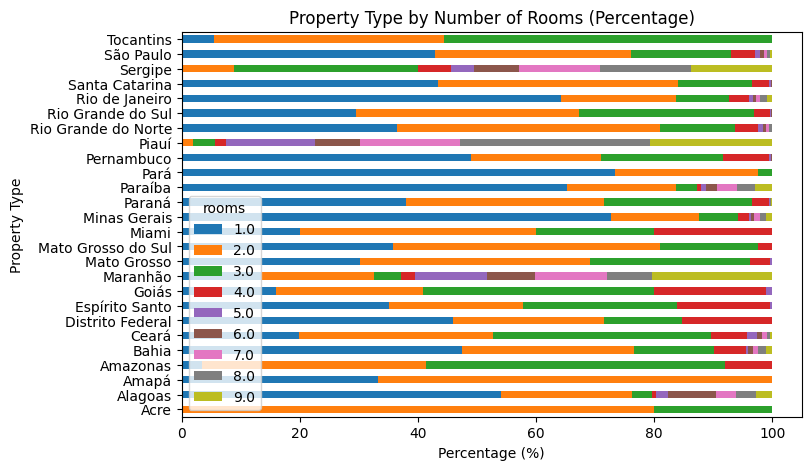

In [57]:
ct_percent = ct.div(ct.sum(axis=1), axis=0) * 100

ct_percent.plot(kind='barh', stacked=True, figsize=(8,5))
plt.title('Property Type by Number of Rooms (Percentage)')
plt.xlabel('Percentage (%)')
plt.ylabel('Property Type')
plt.show()


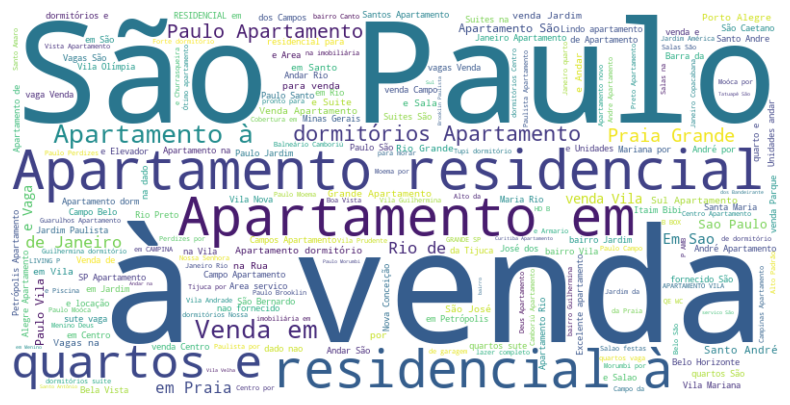

In [58]:
texto = " ".join(df['title'].dropna().astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.show()

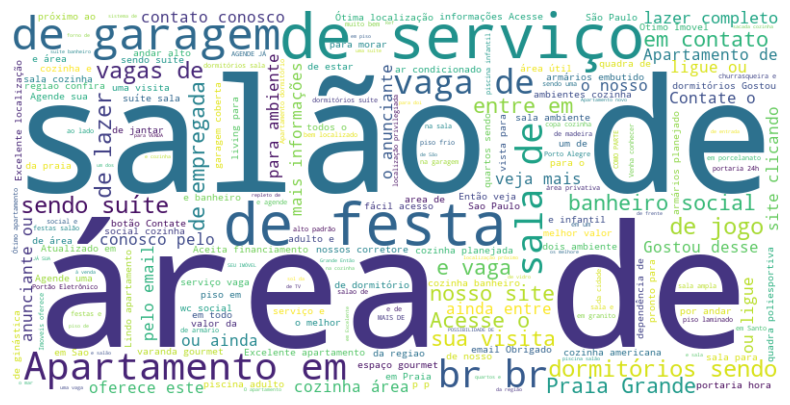

In [59]:
texto = " ".join(df['description'].dropna().astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.show()

In [60]:
df.columns

Index(['created_on', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail', 'state'],
      dtype='object')

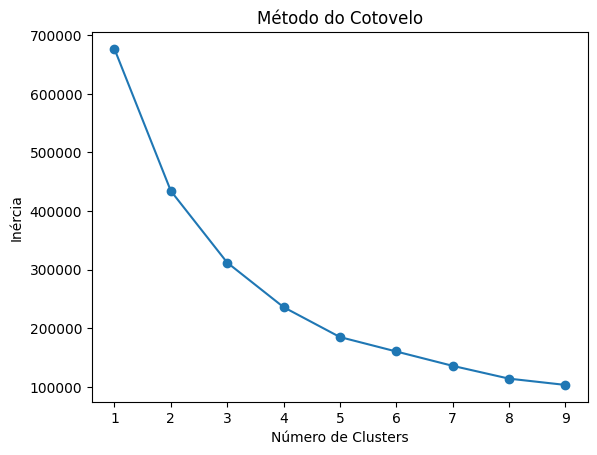

In [61]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = df[['price', 'rooms']].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

In [62]:
X.columns

Index(['price', 'rooms'], dtype='object')

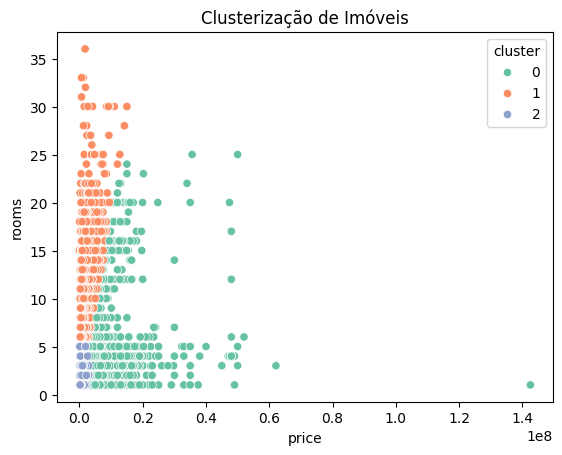

In [63]:
kmeans = KMeans(n_clusters=3, random_state=42)
X['cluster'] = kmeans.fit_predict(X_scaled)

# Visualizar clusters
sns.scatterplot(data=X, x='price', y='rooms', hue='cluster', palette='Set2')
plt.title('Clusterização de Imóveis')
plt.show()

In [65]:
df.to_csv('C:\\Users\\Eduarda\\Documents\\real_state\\data\\sell.csv', index=False)